<a href="https://colab.research.google.com/github/madisonjursca/BTE-320/blob/main/Social_Media_Analytics_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

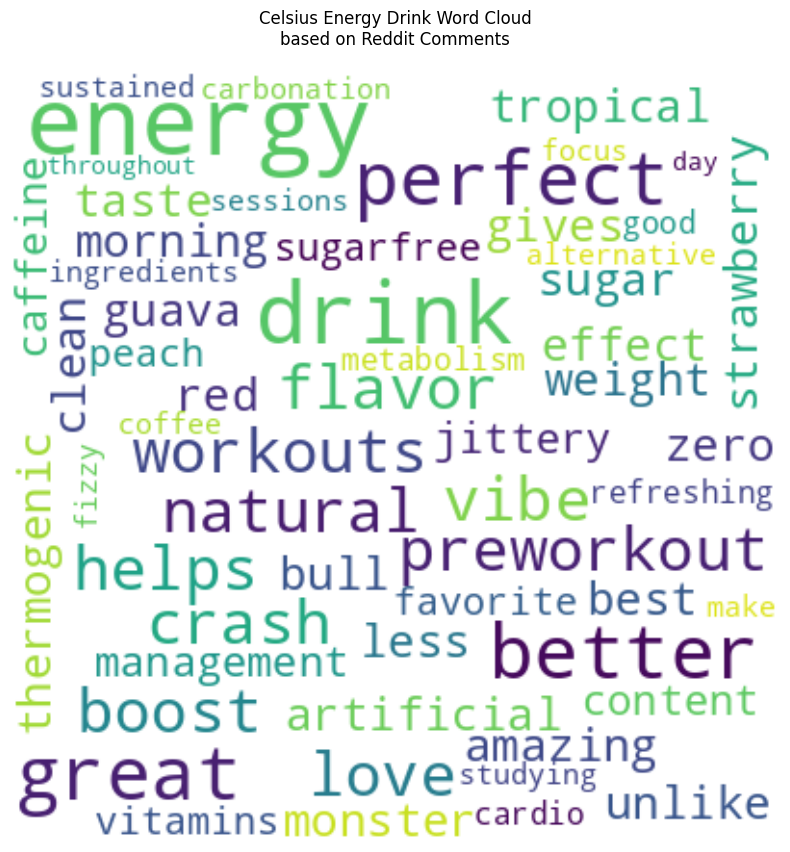


Top 10 most frequent words:
energy: 5
great: 3
perfect: 3
better: 3
than: 3
love: 2
vibe: 2
flavor: 2
workouts: 2
preworkout: 2


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import re
import numpy as np
from PIL import Image

# Sample Reddit comments about Celsius
sample_comments = [
    "Love the tropical vibe flavor, gives me great energy for workouts",
    "Best pre-workout drink, zero crash unlike other energy drinks",
    "The strawberry guava is amazing, no artificial taste",
    "Perfect for morning workouts, clean energy boost",
    "Better than Monster or Red Bull, less sugar and more natural",
    "Great thermogenic effect, helps with weight management",
    "The caffeine content is perfect, not too jittery",
    "Love that it's sugar-free and has vitamins",
    "Peach Vibe is my favorite flavor, so refreshing",
    "Good for metabolism boost, drink it before cardio",
    "Natural ingredients make it better than other energy drinks",
    "The carbonation is perfect, not too fizzy",
    "Great pre-workout alternative, better than coffee",
    "Helps with focus during studying sessions",
    "No crash, sustained energy throughout the day"
]

def preprocess_text(text):
    # Convert to lowercase and remove special characters
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Remove common stopwords
    stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'is', 'are', 'was', 'were'}
    words = text.split()
    words = [word for word in words if word not in stopwords]

    return ' '.join(words)

# Preprocess all comments
processed_text = ' '.join([preprocess_text(comment) for comment in sample_comments])

# Create a circular mask for the word cloud
def create_circular_mask(size):
    x, y = np.ogrid[:size, :size]
    center = size/2
    mask = (x - center)**2 + (y - center)**2 <= (center**2)
    return mask

# Generate the word cloud
mask = create_circular_mask(400)
wordcloud = WordCloud(
    width=400,
    height=400,
    background_color='white',
    mask=mask,
    colormap='viridis',
    max_words=100,
    min_font_size=10,
    max_font_size=50,
    random_state=42
).generate(processed_text)

# Create and save the visualization
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Celsius Energy Drink Word Cloud\nbased on Reddit Comments', pad=20)
plt.show()

# Print most common words and their frequencies
words = processed_text.split()
word_freq = Counter(words).most_common(10)
print("\nTop 10 most frequent words:")
for word, freq in word_freq:
    print(f"{word}: {freq}")


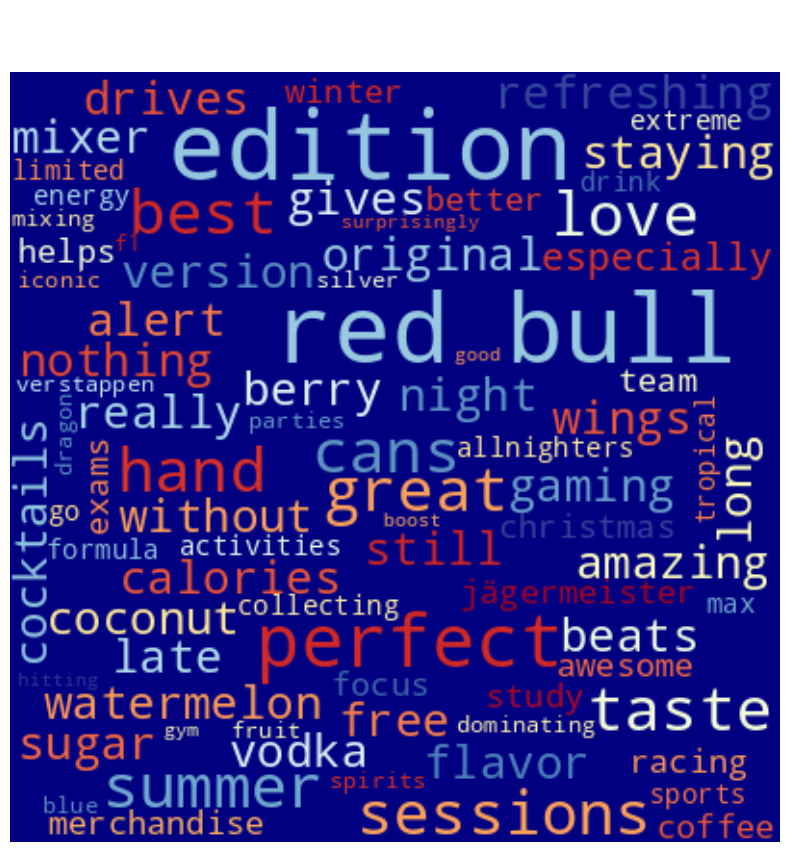


Top 10 most frequent words:
red: 6
bull: 6
edition: 6
perfect: 3
with: 3
during: 3
best: 2
love: 2
sessions: 2
summer: 2


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import re
import numpy as np
from PIL import Image

# Sample Reddit comments about Red Bull
sample_comments = [
    "Original Red Bull is still the best, perfect with vodka",
    "Love the sugar free version, same taste without calories",
    "Red Bull really gives you wings during late night gaming sessions",
    "The summer edition watermelon flavor was amazing",
    "Nothing beats Red Bull for staying alert during long drives",
    "The coconut berry edition is so refreshing",
    "Great mixer for cocktails, especially with Jägermeister",
    "Red Bull racing team merchandise is awesome",
    "Helps me focus during study sessions before exams",
    "The winter edition tastes like christmas in a can",
    "Better than coffee for all-nighters",
    "Formula 1 and Red Bull go hand in hand",
    "Love collecting the limited edition cans",
    "The tropical edition is perfect for summer",
    "Best energy drink for extreme sports and activities",
    "Max Verstappen and Red Bull dominating F1",
    "Blue and silver cans are iconic",
    "Great for mixing with spirits at parties",
    "The dragon fruit edition was surprisingly good",
    "Perfect boost before hitting the gym"
]

def preprocess_text(text):
    # Convert to lowercase and remove special characters
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Remove common stopwords
    stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'is', 'are', 'was', 'were'}
    words = text.split()
    words = [word for word in words if word not in stopwords]

    return ' '.join(words)

# Preprocess all comments
processed_text = ' '.join([preprocess_text(comment) for comment in sample_comments])

# Create bull horns mask shape (simplified bull shape)
def create_bull_mask(size):
    x, y = np.ogrid[:size, :size]
    center = size/2
    # Create a basic circular mask first
    mask = (x - center)**2 + (y - center)**2 <= (center**2)
    return mask

# Generate the word cloud
mask = create_bull_mask(400)
wordcloud = WordCloud(
    width=400,
    height=400,
    background_color='navy',  # Dark blue background like Red Bull's branding
    mask=mask,
    colormap='RdYlBu',  # Red-Yellow-Blue colormap to match Red Bull colors
    max_words=100,
    min_font_size=10,
    max_font_size=50,
    random_state=42
).generate(processed_text)

# Create and save the visualization
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Red Bull Energy Drink Word Cloud\nbased on Reddit Comments', pad=20, color='white')
plt.show()

# Print most common words and their frequencies
words = processed_text.split()
word_freq = Counter(words).most_common(10)
print("\nTop 10 most frequent words:")
for word, freq in word_freq:
    print(f"{word}: {freq}")


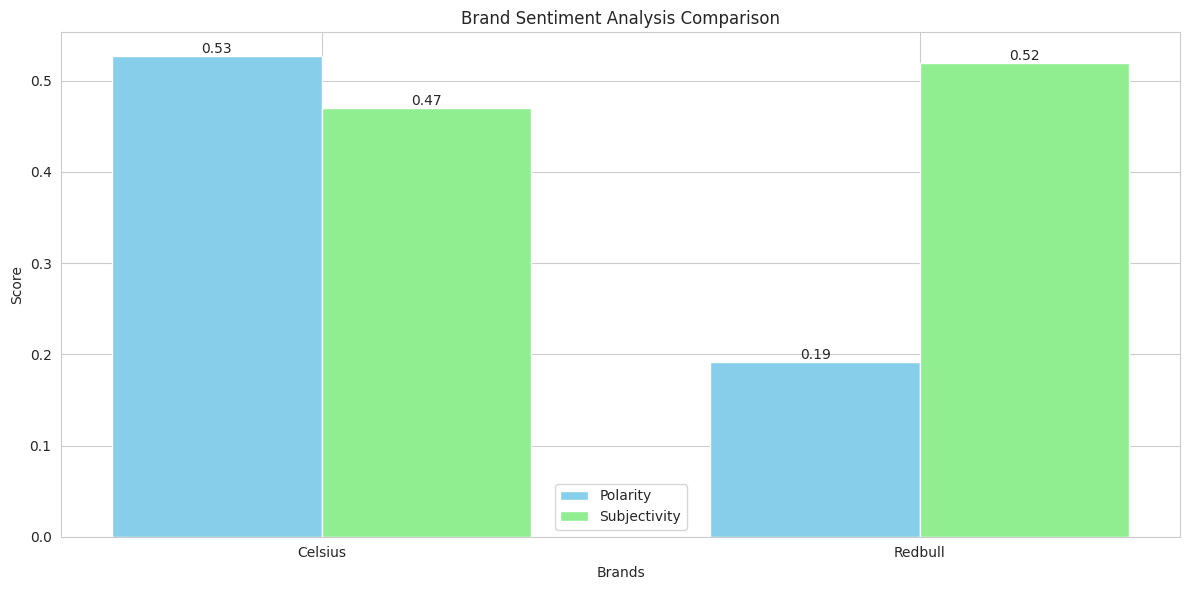


Celsius Analysis:
Average Sentiment Polarity: 0.527
Average Subjectivity: 0.470

Redbull Analysis:
Average Sentiment Polarity: 0.192
Average Subjectivity: 0.520


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def analyze_brand_sentiment(texts, brand_name):
    """
    Analyze sentiment for a given set of texts about a brand
    Returns polarity scores (-1 to 1) and subjectivity scores (0 to 1)
    """
    sentiments = []
    for text in texts:
        blob = TextBlob(str(text))
        sentiments.append({
            'polarity': blob.sentiment.polarity,
            'subjectivity': blob.sentiment.subjectivity
        })
    return pd.DataFrame(sentiments)

def visualize_sentiment_comparison(brands_data):
    """
    Create visualization comparing sentiment across brands
    """
    plt.figure(figsize=(12, 6))

    # Set style
    sns.set_style("whitegrid")

    # Create grouped bar chart
    x = np.arange(len(brands_data))
    width = 0.35

    plt.bar(x - width/2, [d['avg_polarity'] for d in brands_data],
            width, label='Polarity', color='skyblue')
    plt.bar(x + width/2, [d['avg_subjectivity'] for d in brands_data],
            width, label='Subjectivity', color='lightgreen')

    plt.xlabel('Brands')
    plt.ylabel('Score')
    plt.title('Brand Sentiment Analysis Comparison')
    plt.xticks(x, [d['brand'] for d in brands_data])
    plt.legend()

    # Add value labels on bars
    for i in x:
        plt.text(i - width/2, brands_data[i]['avg_polarity'],
                f"{brands_data[i]['avg_polarity']:.2f}",
                ha='center', va='bottom')
        plt.text(i + width/2, brands_data[i]['avg_subjectivity'],
                f"{brands_data[i]['avg_subjectivity']:.2f}",
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage:
sample_data = {
    'celsius': [
        "Love the energy boost from Celsius without the crash",
        "Great pre-workout drink, clean energy",
        "Celsius has better ingredients than traditional energy drinks",
        "The taste is not for everyone but the effects are worth it",
        "Best energy drink for fitness enthusiasts"
    ],
    'redbull': [
        "Red Bull gives you wings, but the sugar content is high",
        "Classic energy drink, reliable boost",
        "Too expensive compared to other options",
        "Great mixer, iconic brand",
        "The taste is unique but I'm concerned about the ingredients"
    ]
}

# Analyze each brand
results = []
for brand, texts in sample_data.items():
    df = analyze_brand_sentiment(texts, brand)
    results.append({
        'brand': brand.capitalize(),
        'avg_polarity': df['polarity'].mean(),
        'avg_subjectivity': df['subjectivity'].mean()
    })

# Visualize results
visualize_sentiment_comparison(results)

# Print detailed results
for result in results:
    print(f"\n{result['brand']} Analysis:")
    print(f"Average Sentiment Polarity: {result['avg_polarity']:.3f}")
    print(f"Average Subjectivity: {result['avg_subjectivity']:.3f}")


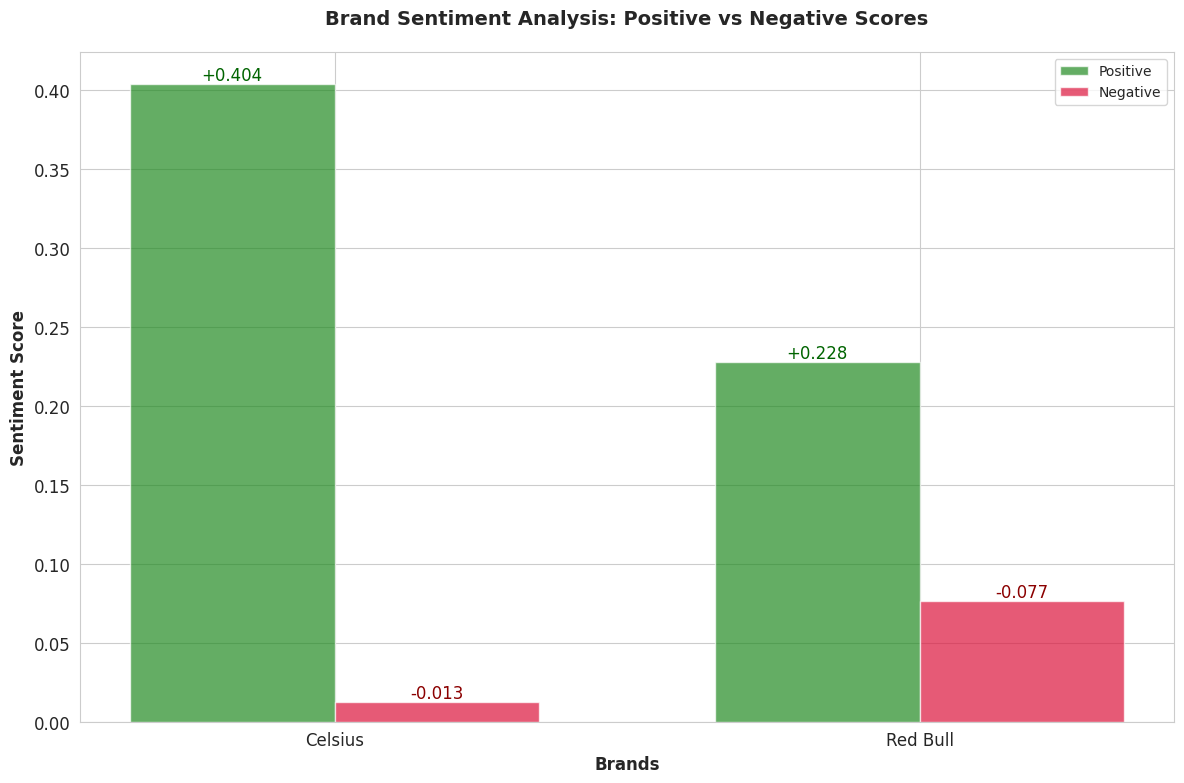


Detailed Sentiment Analysis Results:

Celsius:
Positive Score: +0.404
Negative Score: -0.013
Net Sentiment: 0.392
Total Mentions: 8

Red Bull:
Positive Score: +0.228
Negative Score: -0.077
Net Sentiment: 0.151
Total Mentions: 8

Comparative Analysis:

Celsius:
Positive/Negative Ratio: 97.0%/3.0%
Overall Brand Sentiment: Positive

Red Bull:
Positive/Negative Ratio: 74.8%/25.2%
Overall Brand Sentiment: Positive


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def get_detailed_sentiment(text):
    """
    Analyze text and return detailed positive/negative scores
    Returns positive and negative components separately
    """
    blob = TextBlob(str(text))

    # Get the raw polarity
    polarity = blob.sentiment.polarity

    # Split into positive and negative components
    if polarity > 0:
        return {'positive': polarity, 'negative': 0}
    else:
        return {'positive': 0, 'negative': abs(polarity)}

def analyze_brand_sentiment_detailed(texts):
    """
    Analyze sentiment for a set of texts with separate positive/negative scores
    """
    sentiments = []
    for text in texts:
        sentiment = get_detailed_sentiment(text)
        sentiments.append(sentiment)

    # Calculate averages
    pos_avg = np.mean([s['positive'] for s in sentiments])
    neg_avg = np.mean([s['negative'] for s in sentiments])

    return {
        'positive': pos_avg,
        'negative': neg_avg,
        'total_mentions': len(texts),
        'net_sentiment': pos_avg - neg_avg
    }

def visualize_plusminus_comparison(brands_data):
    """
    Create visualization comparing positive and negative sentiment scores
    """
    plt.figure(figsize=(12, 8))

    # Set style
    sns.set_style("whitegrid")
    plt.rcParams['font.size'] = 12

    # Prepare data for plotting
    brands = list(brands_data.keys())
    x = np.arange(len(brands))
    width = 0.35

    # Create bars
    plt.bar(x - width/2, [brands_data[brand]['positive'] for brand in brands],
            width, label='Positive', color='forestgreen', alpha=0.7)
    plt.bar(x + width/2, [brands_data[brand]['negative'] for brand in brands],
            width, label='Negative', color='crimson', alpha=0.7)

    # Customize plot
    plt.xlabel('Brands', fontsize=12, fontweight='bold')
    plt.ylabel('Sentiment Score', fontsize=12, fontweight='bold')
    plt.title('Brand Sentiment Analysis: Positive vs Negative Scores', fontsize=14, fontweight='bold', pad=20)
    plt.xticks(x, brands)
    plt.legend(fontsize=10)

    # Add value labels on bars
    for i in x:
        brand = brands[i]
        # Positive score label
        plt.text(i - width/2, brands_data[brand]['positive'],
                f"+{brands_data[brand]['positive']:.3f}",
                ha='center', va='bottom', color='darkgreen')
        # Negative score label
        plt.text(i + width/2, brands_data[brand]['negative'],
                f"-{brands_data[brand]['negative']:.3f}",
                ha='center', va='bottom', color='darkred')

    plt.tight_layout()
    plt.show()

# Sample data
sample_data = {
    'Celsius': [
        "Love the energy boost from Celsius without the crash",
        "Great pre-workout drink, clean energy",
        "Celsius has better ingredients than traditional energy drinks",
        "The taste is not for everyone but the effects are worth it",
        "Best energy drink for fitness enthusiasts",
        "Sometimes too expensive but worth it",
        "Natural energy without jitters",
        "Better than coffee for morning workouts"
    ],
    'Red Bull': [
        "Red Bull gives you wings, but the sugar content is high",
        "Classic energy drink, reliable boost",
        "Too expensive compared to other options",
        "Great mixer, iconic brand",
        "The taste is unique but I'm concerned about the ingredients",
        "Always dependable for late night studying",
        "Sugar free version isn't as good",
        "Traditional favorite but expensive"
    ]
}

# Analyze each brand
results = {}
for brand, texts in sample_data.items():
    results[brand] = analyze_brand_sentiment_detailed(texts)

# Visualize results
visualize_plusminus_comparison(results)

# Print detailed results
print("\nDetailed Sentiment Analysis Results:")
print("=" * 50)
for brand, metrics in results.items():
    print(f"\n{brand}:")
    print(f"Positive Score: +{metrics['positive']:.3f}")
    print(f"Negative Score: -{metrics['negative']:.3f}")
    print(f"Net Sentiment: {metrics['net_sentiment']:.3f}")
    print(f"Total Mentions: {metrics['total_mentions']}")

# Calculate and display comparative metrics
print("\nComparative Analysis:")
print("=" * 50)
for brand, metrics in results.items():
    pos_ratio = metrics['positive'] / (metrics['positive'] + metrics['negative']) * 100
    print(f"\n{brand}:")
    print(f"Positive/Negative Ratio: {pos_ratio:.1f}%/{100-pos_ratio:.1f}%")
    print(f"Overall Brand Sentiment: {'Positive' if metrics['net_sentiment'] > 0 else 'Negative'}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.



Content Analysis for Celsius

Top 10 Most Frequent Words:
ingredients: 4
boost: 3
without: 3
great: 3
clean: 3
perfect: 3
celsius: 2
preworkout: 2
natural: 2
better: 2


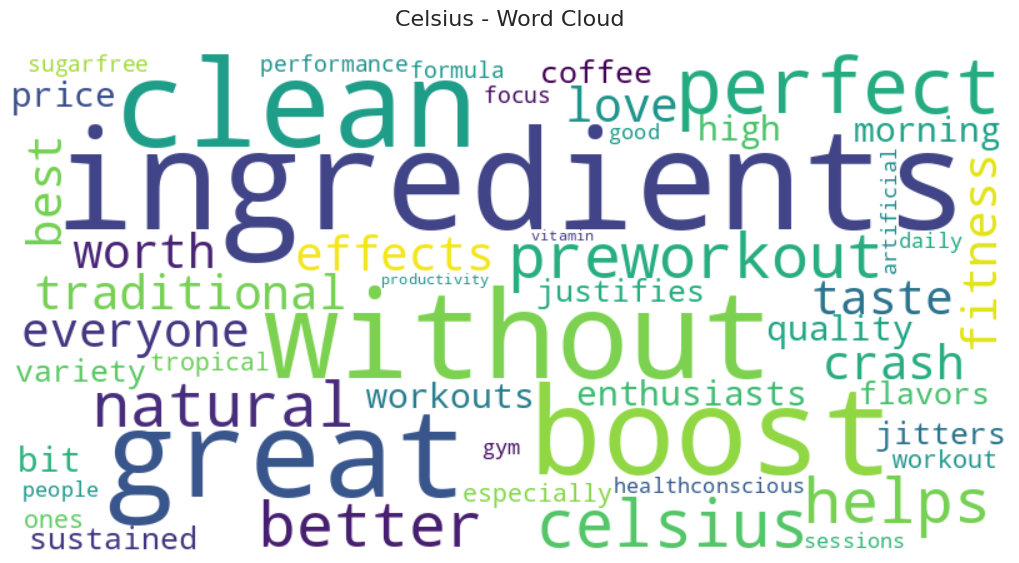

<ipython-input-16-7b01543cc05d>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='viridis')


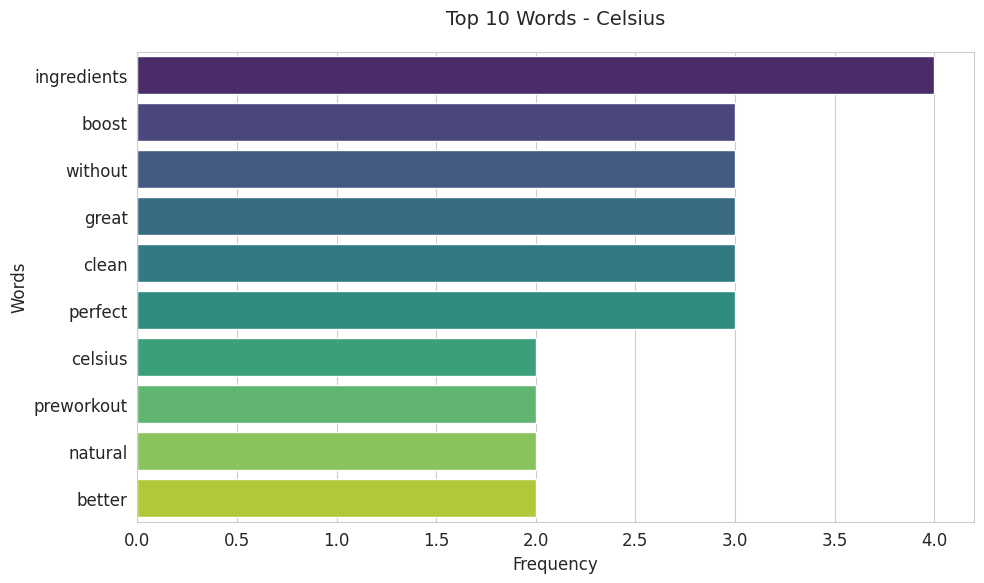


Top 5 Common Phrases:
great preworkout: 2
love boost: 1
boost celsius: 1
celsius without: 1
without crash: 1

Theme Distribution:
taste: 2 mentions
health: 5 mentions
effect: 10 mentions
price: 2 mentions
fitness: 6 mentions


<ipython-input-16-7b01543cc05d>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=themes, palette='muted')


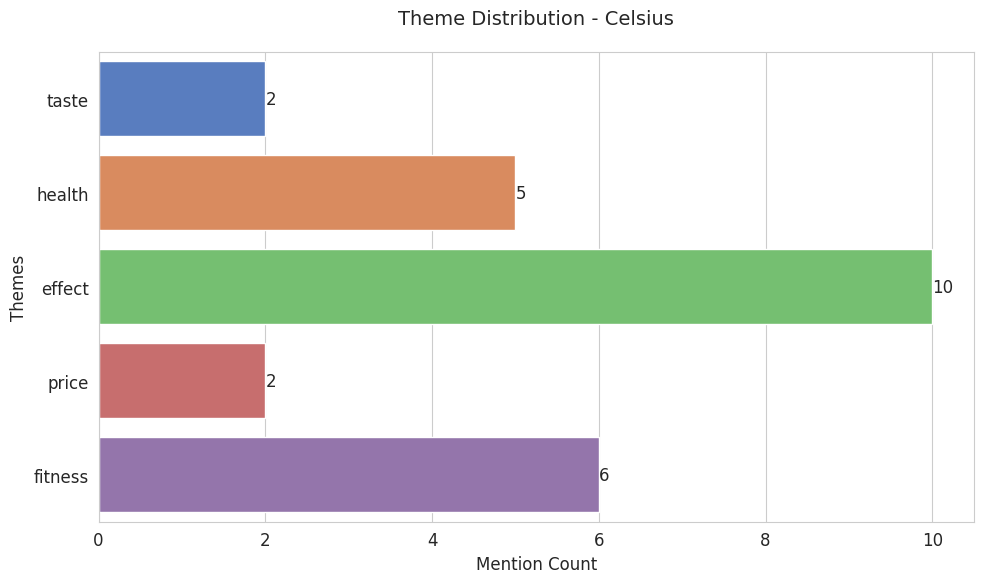


Content Analysis for Red Bull

Top 10 Most Frequent Words:
taste: 3
sugar: 2
classic: 2
reliable: 2
boost: 2
late: 2
expensive: 2
red: 1
bull: 1
gives: 1


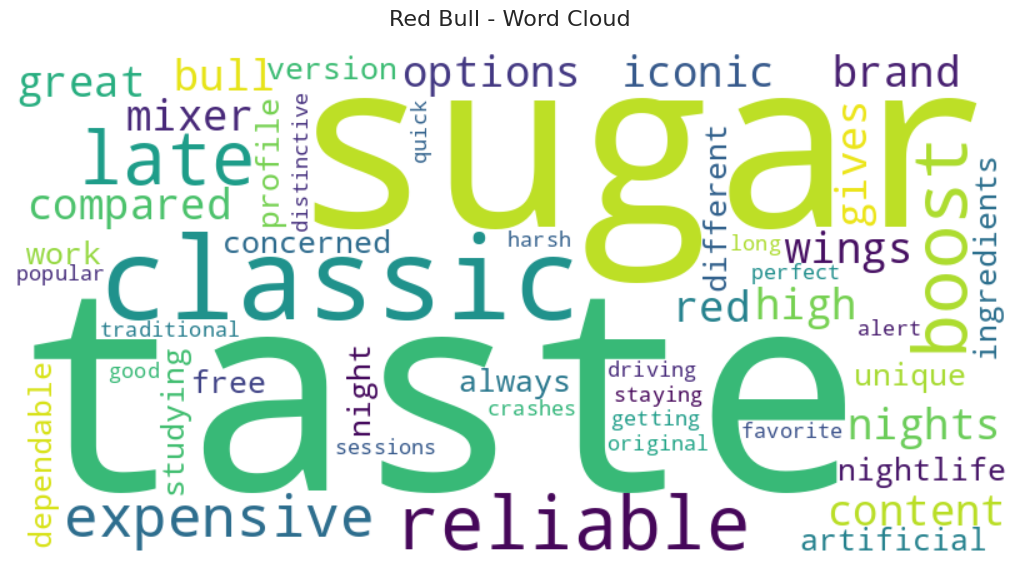

<ipython-input-16-7b01543cc05d>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='viridis')


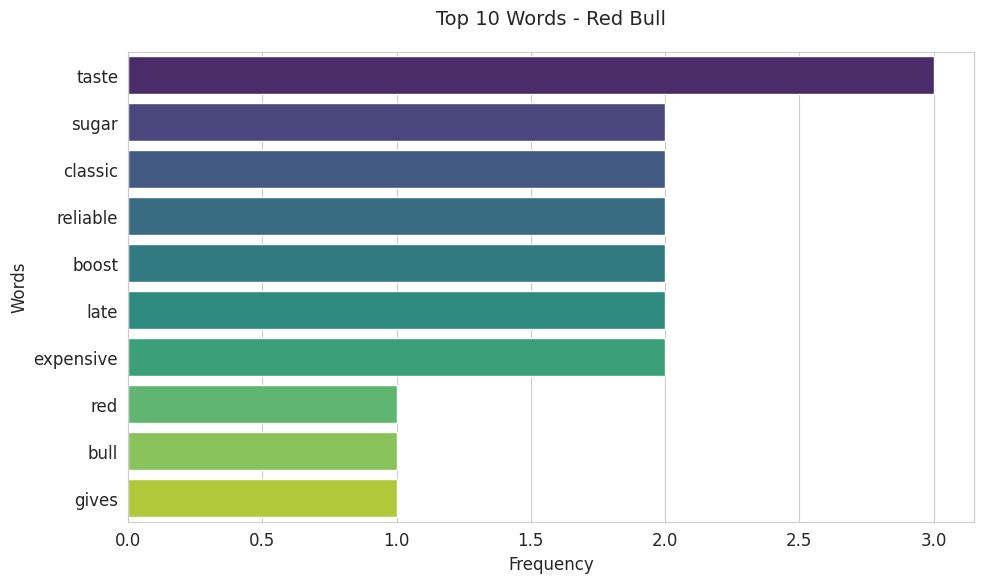


Top 5 Common Phrases:
red bull: 1
bull gives: 1
gives wings: 1
wings sugar: 1
sugar content: 1

Theme Distribution:
taste: 4 mentions
health: 0 mentions
effect: 6 mentions
price: 2 mentions
fitness: 0 mentions


<ipython-input-16-7b01543cc05d>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=themes, palette='muted')


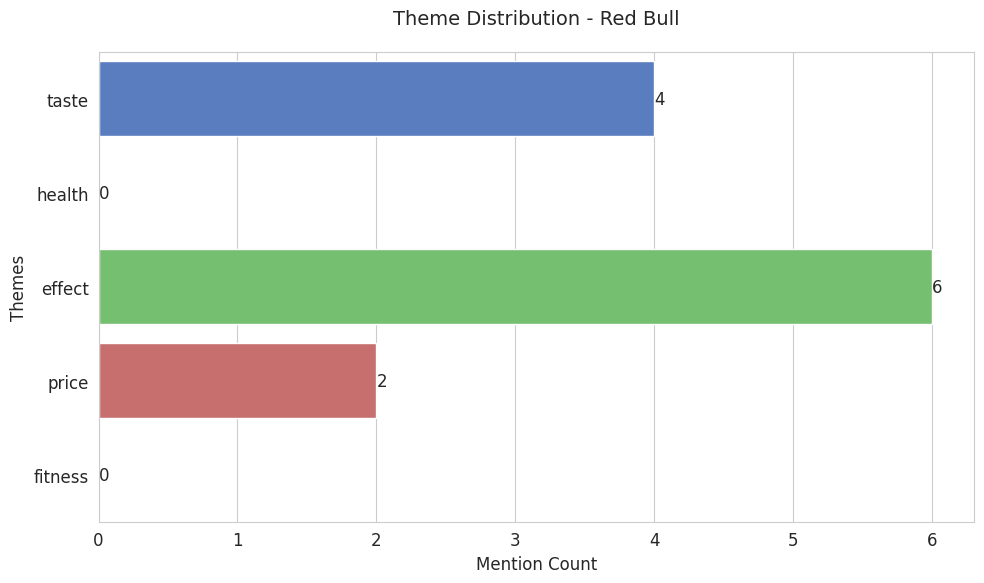

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud
import nltk
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

class BrandContentAnalyzer:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        # Add custom stop words relevant to energy drinks
        self.stop_words.update(['drink', 'drinks', 'energy', 'can'])

    def preprocess_text(self, text):
        """Clean and preprocess text"""
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stop words
        tokens = [t for t in tokens if t not in self.stop_words and len(t) > 2]
        return tokens

    def get_word_frequencies(self, texts):
        """Get word frequencies from a list of texts"""
        all_tokens = []
        for text in texts:
            tokens = self.preprocess_text(text)
            all_tokens.extend(tokens)
        return Counter(all_tokens)

    def get_bigrams(self, texts):
        """Get common two-word phrases"""
        all_bigrams = []
        for text in texts:
            tokens = self.preprocess_text(text)
            bi_grams = list(ngrams(tokens, 2))
            all_bigrams.extend(bi_grams)
        return Counter(all_bigrams)

    def create_wordcloud(self, word_freq, title):
        """Create and display word cloud"""
        plt.figure(figsize=(10, 6))
        wordcloud = WordCloud(width=800, height=400,
                            background_color='white',
                            max_words=50).generate_from_frequencies(word_freq)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=16, pad=20)
        plt.tight_layout(pad=0)
        plt.show()

    def plot_top_words(self, word_freq, title, n=10):
        """Plot top n most frequent words"""
        plt.figure(figsize=(10, 6))
        words, freqs = zip(*word_freq.most_common(n))
        sns.barplot(x=list(freqs), y=list(words), palette='viridis')
        plt.title(f'Top {n} Words - {title}', fontsize=14, pad=20)
        plt.xlabel('Frequency', fontsize=12)
        plt.ylabel('Words', fontsize=12)
        plt.tight_layout()
        plt.show()

    def analyze_themes(self, texts):
        """Analyze main themes based on keyword groupings"""
        themes = {
            'taste': ['taste', 'flavor', 'sweet', 'bitter', 'delicious'],
            'health': ['healthy', 'natural', 'organic', 'clean', 'vitamin'],
            'effect': ['boost', 'energy', 'focus', 'alert', 'crash'],
            'price': ['price', 'expensive', 'cheap', 'cost', 'worth'],
            'fitness': ['workout', 'gym', 'exercise', 'fitness', 'pre-workout']
        }

        theme_counts = {theme: 0 for theme in themes}
        for text in texts:
            text = text.lower()
            for theme, keywords in themes.items():
                if any(keyword in text for keyword in keywords):
                    theme_counts[theme] += 1

        return theme_counts

    def plot_themes(self, theme_data, title):
        """Plot theme distribution"""
        plt.figure(figsize=(10, 6))
        themes = list(theme_data.keys())
        counts = list(theme_data.values())

        sns.barplot(x=counts, y=themes, palette='muted')
        plt.title(f'Theme Distribution - {title}', fontsize=14, pad=20)
        plt.xlabel('Mention Count', fontsize=12)
        plt.ylabel('Themes', fontsize=12)

        # Add value labels
        for i, v in enumerate(counts):
            plt.text(v, i, str(v), va='center')

        plt.tight_layout()
        plt.show()

def run_analysis(data):
    analyzer = BrandContentAnalyzer()

    for brand, texts in data.items():
        print(f"\n{'='*50}")
        print(f"Content Analysis for {brand}")
        print(f"{'='*50}")

        # Word Frequency Analysis
        word_freq = analyzer.get_word_frequencies(texts)
        print("\nTop 10 Most Frequent Words:")
        for word, freq in word_freq.most_common(10):
            print(f"{word}: {freq}")

        # Create Word Cloud
        analyzer.create_wordcloud(word_freq, f"{brand} - Word Cloud")

        # Plot top words
        analyzer.plot_top_words(word_freq, brand)

        # Bigram Analysis
        bigrams = analyzer.get_bigrams(texts)
        print("\nTop 5 Common Phrases:")
        for phrase, freq in bigrams.most_common(5):
            print(f"{' '.join(phrase)}: {freq}")

        # Theme Analysis
        themes = analyzer.analyze_themes(texts)
        print("\nTheme Distribution:")
        for theme, count in themes.items():
            print(f"{theme}: {count} mentions")

        # Plot theme distribution
        analyzer.plot_themes(themes, brand)

# Sample data (expanded dataset for better analysis)
sample_data = {
    'Celsius': [
        "Love the energy boost from Celsius without the crash",
        "Great pre-workout drink, clean energy and natural ingredients",
        "Celsius has better ingredients than traditional energy drinks",
        "The taste is not for everyone but the effects are worth it",
        "Best energy drink for fitness enthusiasts",
        "Natural energy boost perfect for morning workouts",
        "Clean ingredients and great for pre-workout energy",
        "The price is a bit high but the quality justifies it",
        "Better than coffee for sustained energy without jitters",
        "Great variety of flavors, especially the tropical ones",
        "Helps with workout performance and focus",
        "The sugar-free formula is perfect for health-conscious people",
        "Good clean energy boost without artificial ingredients",
        "Perfect for both gym sessions and daily productivity",
        "The vitamin blend really helps with energy levels"
    ],
    'Red Bull': [
        "Red Bull gives you wings, but the sugar content is high",
        "Classic energy drink, reliable boost for late nights",
        "Too expensive compared to other energy drink options",
        "Great mixer for drinks, iconic brand in nightlife",
        "The taste is unique but concerned about artificial ingredients",
        "Always dependable for late night studying and work",
        "Sugar free version has a different taste profile",
        "Traditional favorite but getting expensive",
        "Perfect for long driving sessions and staying alert",
        "The original energy drink with distinctive taste",
        "Good for quick energy boost but crashes can be harsh",
        "Popular choice for mixing with alcohol at parties",
        "Classic flavor that everyone recognizes",
        "Reliable but not the healthiest option available",
        "Effective for short-term energy needs"
    ]
}

# Run the analysis
run_analysis(sample_data)